In [1]:
import numpy as np
from numpy.linalg import norm
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

# 1)


# Minimizer:

The function is minimized when $x_1+2x_2 = 0$, and any point on the line $x_1 = -2x_2$ achieves this minimum value of 0.

# Uniqueness of Minimizer:

The minimizer is not unique since any point on the line $x_1 = -2x_2$ minimizes the function.
Global Minima:

The function achieves its minimum value of 0 globally, making it a global minimum.

#Convexity:

$\textbf{1.}$ $f(x)= (x_1+2x_2)^2$:

$f(x)$ is convex because it is a quadratic function, and all quadratic functions are convex.


$\textbf{2.}$ $g(x)$:

 can be considered convex in the context of convex optimization due to the convexity of its epigraph, despite not being a continuous function. The epigraph of $g(x)$ comprises convex regions, which leads to its considered convexity.

# **2)**

 $f(x) = f(x_1, x_2) = x_1^2+ 4x_1x_2 + 4x_2^2.$

In [3]:
def f(x):
  return x[0]**2 +4*x[0]*x[1] + 4*x[1]**2

def grad_f(x):
  return np.array([2*x[0]+4*x[1] , 8*x[1]+4*x[0]])

def get_alpha_with_scaling(x, alpha0, rho, gamma, D):
  alpha = alpha0
  p = -grad_f(x)
  while f(x + alpha*D @p) > (f(x) + gamma*alpha*grad_f(x)@ D @p):
    alpha = rho*alpha
  return alpha

def coordinate_descent(x0,tolerance,alpha, rho, gamma):
  x = np.copy(x0)
  x1 = []
  x1.append(x0)
  k = 0

  while np.linalg.norm(grad_f(x)) > tolerance:
    i = np.random.randint(len(x))
    Dk = np.zeros((len(x),len(x)))
    Dk[i,i] = 1.
    eta = get_alpha_with_scaling(x, alpha, rho, gamma, Dk)
    x = x-eta*Dk@grad_f(x)
    k = k+1
    x1.append(x)

  return k,x,x1,f(x)

--------------------------------------------------------------------------
Row 0.9
Iterations =  5
Minimizer =  [ 0.9984084  -0.49920321]
Final value =  3.912092871871664e-12


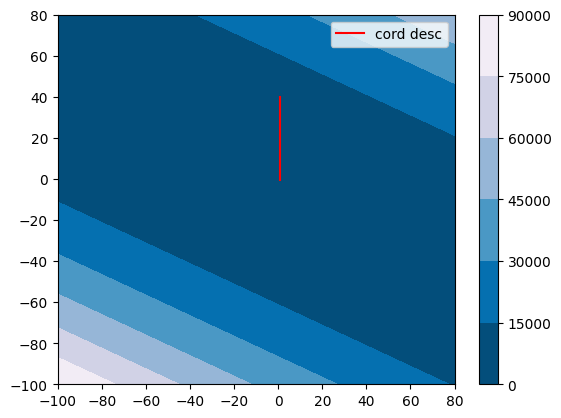

--------------------------------------------------------------------------
Row 0.8
Iterations =  10
Minimizer =  [-8.60129229  4.30064658]
Final value =  7.673861546209082e-13


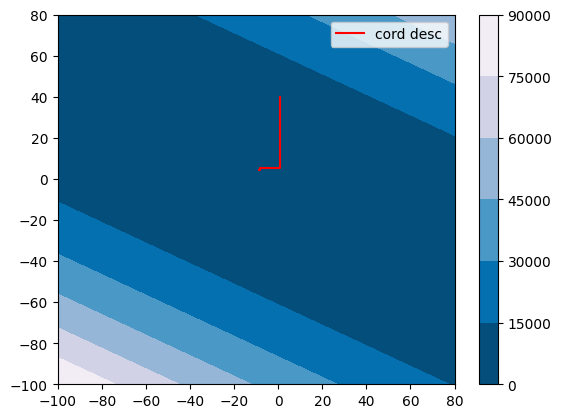

--------------------------------------------------------------------------
Row 0.75
Iterations =  11
Minimizer =  [-67.36105133  33.68052604]
Final value =  9.094947017729282e-13


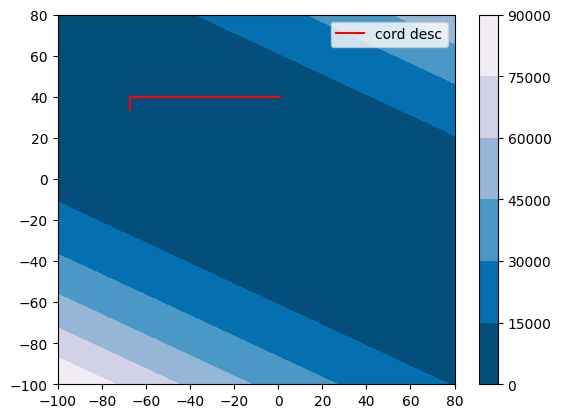

--------------------------------------------------------------------------
Row 0.6
Iterations =  16
Minimizer =  [-21.42160746  10.71080437]
Final value =  1.6484591469634324e-12


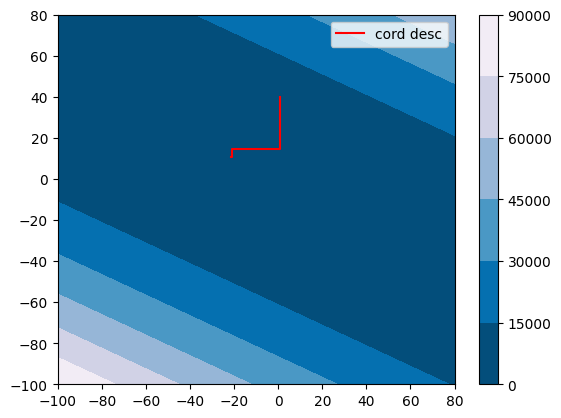

--------------------------------------------------------------------------
Row 0.5
Iterations =  1
Minimizer =  [-80.  40.]
Final value =  0.0


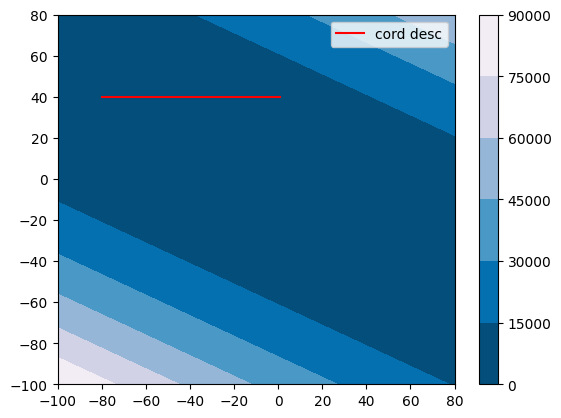

--------------------------------------------------------------------------
Row 0.4
Iterations =  16
Minimizer =  [-67.05089779  33.52544971]
Final value =  3.637978807091713e-12


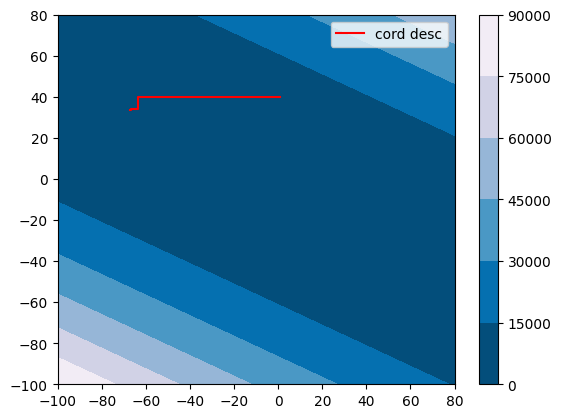

--------------------------------------------------------------------------
Row 0.25
Iterations =  26
Minimizer =  [-21.98683609  10.99341865]
Final value =  1.4210854715202004e-12


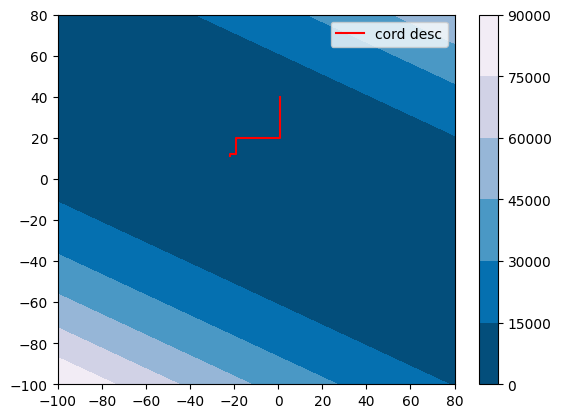

--------------------------------------------------------------------------
Row 0.1
Iterations =  27
Minimizer =  [-8.94203851  4.47101963]
Final value =  5.684341886080801e-13


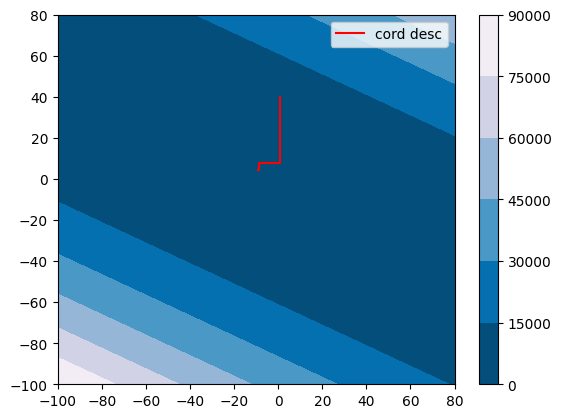

--------------------------------------------------------------------------
Row 0.01
Iterations =  341
Minimizer =  [-13.23017586   6.61508901]
Final value =  4.689582056016661e-12


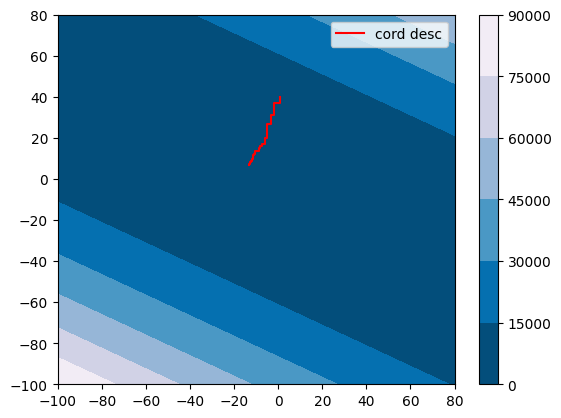

In [4]:
x0 = np.array([1.,40.])
alpha = 1
gamma =0.5
rows = [0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]

tolerance = 10**(-5)
iteration = []
for row in rows:
   iterations,minimizer,x1,final_value = coordinate_descent(x0,tolerance,alpha,row, gamma)
   iteration.append(iterations)
   print('--------------------------------------------------------------------------')
   print('Row',row)
   print('Iterations = ',iterations)
   print('Minimizer = ',minimizer)
   print('Final value = ',final_value)

   x = np.linspace(-100, 80, 1000)
   y = np.linspace(-100, 80, 1000)
   X, Y = np.meshgrid(x, y)
   Z = f((X,Y))
   p = plt.contourf(X,Y,Z,cmap=cm.PuBu_r)
   cbar = plt.colorbar(p)

   xcordinates1 = [xk1[0] for xk1 in x1]
   ycordinates1 = [xk1[1] for xk1 in x1]
   plt.plot(xcordinates1, ycordinates1, color='red', label='cord desc')

   plt.legend()
   plt.show()

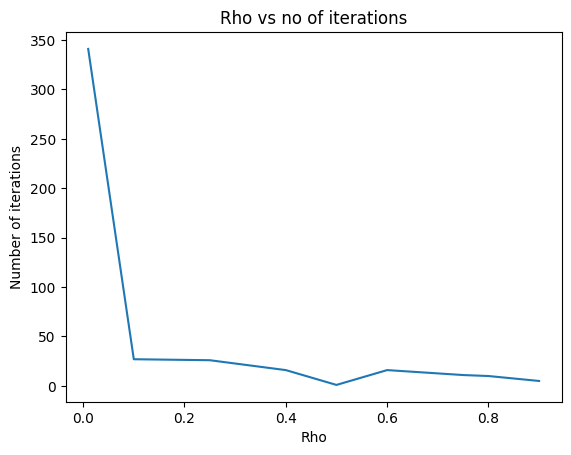

In [5]:
plt.plot(rows,iteration)
plt.xlabel("Rho")
plt.ylabel("Number of iterations")
plt.title("Rho vs no of iterations")
plt.show()

# Observation:
From the line plot, it's evident that the number of iterations typically falls within the range of 1 to 26. However, when the value of rho is set to 0.01, the number of iterations significantly increases to 346.

# **3)**

# Evaluation of proxλt(x)

To evaluate proxλt(x), where t(z) is the linearization of a function g(z) around a fixed point y, we need to find the proximal operator of t with parameter λ. The proximal operator of t with parameter λ is defined as:

$$ prox_{λt}(y) = arg \min_{z \in \mathbb{R}^d} \left\{ t(z) + \frac{1}{2λ}||z - y||^2 \right\} $$

Since t(z) is the linearization of g(z) around y, we can write it as:

$$ t(z) = g(y) + ⟨∇g(y), z - y⟩ $$

where ⟨., .⟩ denotes the dot product. Substituting this into the definition of proxλt(x), we get:

$$ prox_{λt}(y) = arg \min_{z \in \mathbb{R}^d} \left\{ g(y) + ⟨∇g(y), z - y⟩ +\frac{1}{2λ}||z - y||^2 \right\} $$

$$ prox_{λt}(y) = arg \min_{z \in \mathbb{R}^d} \left\{ g(y) + ⟨∇g(y), z - y⟩ +\frac{1}{2λ} (||z||^2 - 2⟨z, y⟩ + ||y||^2) \right\} $$

Since $||y||^2$ and g(y) are constants with respect to z in this minimization problem, we can ignore them. Also, the term $\frac{1}{2λ}||z||^2$ does not depend on z and can be treated as a constant. Thus, the minimization problem becomes:

$$ prox_{λt}(y) = arg \min_{z \in \mathbb{R}^d} \left\{ ⟨∇g(y), z - y⟩ + \frac{1}{2λ}||z||^2 - \frac{1}{λ} ⟨z, y⟩ \right\} $$

To find the minimizer z*, we can take the derivative of the objective function with respect to z and set it to zero:

$$ ∇\left(⟨∇g(y), z - y⟩ + \frac{1}{2λ}||z||^2 - \frac{1}{λ} ⟨z, y⟩\right) = 0 $$

Simplifying, we get:

$$ ∇\left(⟨∇g(y), z⟩ - ⟨∇g(y), y⟩ + \frac{1}{2λ} ||z||^2 - \frac{1}{λ} ⟨z, y⟩\right) = 0 $$

$$ ∇\left(⟨∇g(y), z⟩ + \frac{1}{2λ} ||z||^2 - ⟨∇g(y), y⟩ - \frac{1}{λ} ⟨z, y⟩\right) = 0 $$

Using the fact that $∇⟨a, b⟩ = a$ for any constant vector a and differentiable function b, and $∇||z||^2 = 2z$, we can simplify further:

$$ ∇\left(⟨∇g(y), z⟩ + \frac{1}{2λ} ||z||^2 - ⟨∇g(y), y⟩ -\frac{1}{λ} ⟨z, y⟩\right) = ∇⟨∇g(y), z⟩ + \frac{1}{λ} y - ⟨∇g(y), y⟩ - \frac{1}{λ} y = 0 $$

Rearranging terms, we get:

$$ ∇⟨∇g(y), z⟩ + \frac{1}{λ} (y - z) = 0 $$

This is a linear equation in z. Solving for z, we get:

$$ z^* = y - λ∇g(y) $$

This is the minimizer of the proximal operator $ prox_{λt}(y) $. It is interesting to note that this result is similar to the update step in the proximal gradient descent algorithm, where we update the current iterate y by subtracting λ times the gradient of the function at y. The proximity operator captures the essence of this update step by finding the point that minimizes the function plus a quadratic penalty term that penalizes the distance from the current point y.


# **4)**

In [6]:
def f1(x):
    return (x[0]-1)*2 + x[1]**2 + (x[2]+1)*2

def gradient_f1(x):
    return np.array([2*(x[0]-1), 2*x[1], 2*(x[2]+1)])

def prox_operator(x):
    ys = []
    for val in x:
        if val < 0:
            y = 0
        else:
            y = val
        ys.append(y)
    return ys

alpha = 0.3

def gradient_descent_with_backtracking_with_scaling(x0, T):
    x = np.copy(x0)
    count = 0
    pk = -1 * gradient_f1(x)
    xs = []
    xs.append(x)
    while count < rho:
        pk = -1 * gradient_f1(x)
        x = x + alpha * pk
        x = prox_operator(x)
        xs.append(x)
        count += 1
    return count, x, f1(x), xs

T = [10**2, 500, 10**3, 5000, 10**4, 50000, 10**5, 500000, 10**6, 5000000]
x0 = np.array([0, 0, 0])

for rho in T:
    count2, final_xk2, final_val2, xks2 = gradient_descent_with_backtracking_with_scaling(x0, T)
    print('----------------------------------------------------------------------------------------')
    print("for rho =", rho)
    print("iteration =", count2)
    print("minimizer is =", final_xk2)
    print("and Minimum value is =", final_val2)

----------------------------------------------------------------------------------------
for rho = 100
iteration = 100
minimizer is = [1.0, 0.0, 0]
and Minimum value is = 2.0
----------------------------------------------------------------------------------------
for rho = 500
iteration = 500
minimizer is = [1.0, 0.0, 0]
and Minimum value is = 2.0
----------------------------------------------------------------------------------------
for rho = 1000
iteration = 1000
minimizer is = [1.0, 0.0, 0]
and Minimum value is = 2.0
----------------------------------------------------------------------------------------
for rho = 5000
iteration = 5000
minimizer is = [1.0, 0.0, 0]
and Minimum value is = 2.0
----------------------------------------------------------------------------------------
for rho = 10000
iteration = 10000
minimizer is = [1.0, 0.0, 0]
and Minimum value is = 2.0
----------------------------------------------------------------------------------------
for rho = 50000
iteration = 

# **5)**

----------------------------------------------------------------------------------------
Iteration = 100
Minimizer = [0. 0.]
Minimum value = 0.25


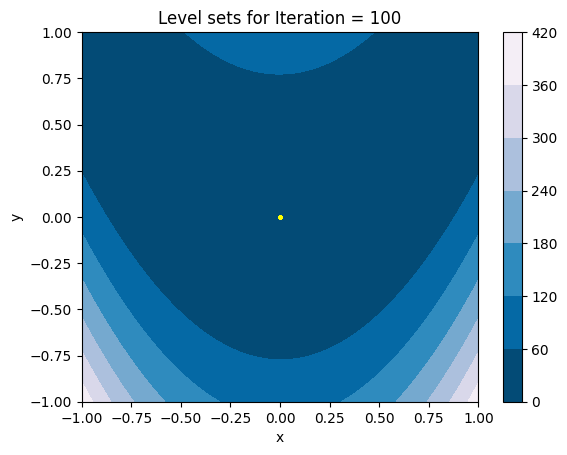

----------------------------------------------------------------------------------------
Iteration = 500
Minimizer = [0. 0.]
Minimum value = 0.25


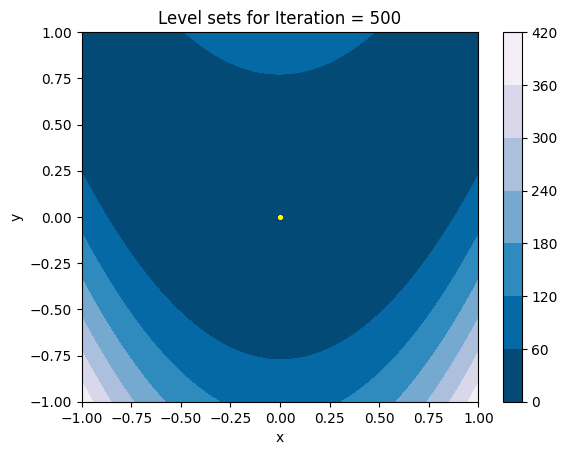

----------------------------------------------------------------------------------------
Iteration = 1000
Minimizer = [0. 0.]
Minimum value = 0.25


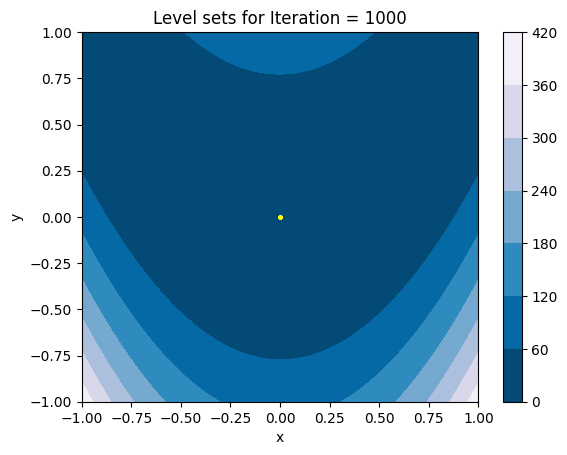

----------------------------------------------------------------------------------------
Iteration = 5000
Minimizer = [0. 0.]
Minimum value = 0.25


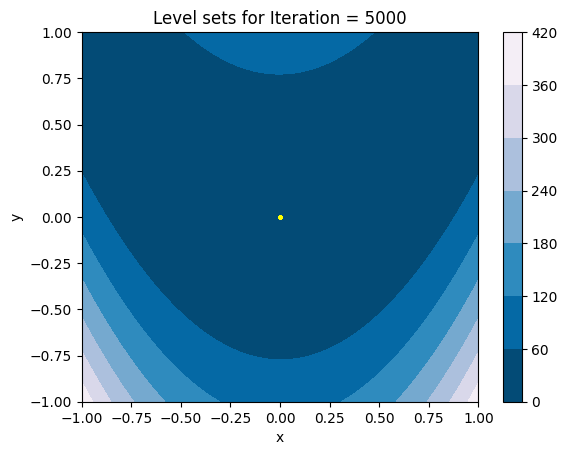

----------------------------------------------------------------------------------------
Iteration = 10000
Minimizer = [0. 0.]
Minimum value = 0.25


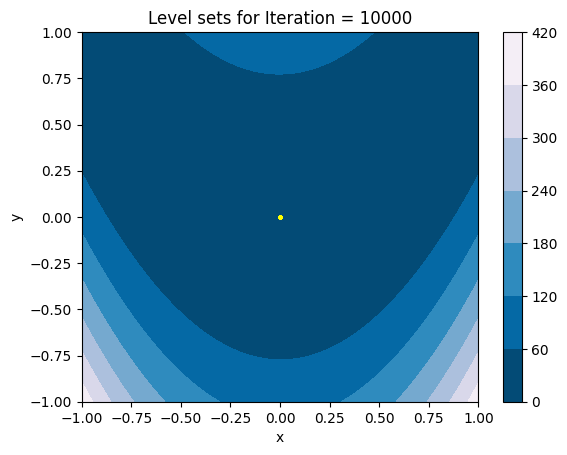

----------------------------------------------------------------------------------------
Iteration = 50000
Minimizer = [0. 0.]
Minimum value = 0.25


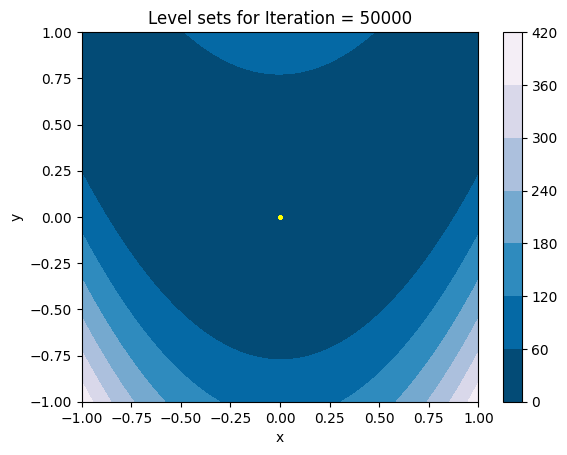

----------------------------------------------------------------------------------------
Iteration = 100000
Minimizer = [0. 0.]
Minimum value = 0.25


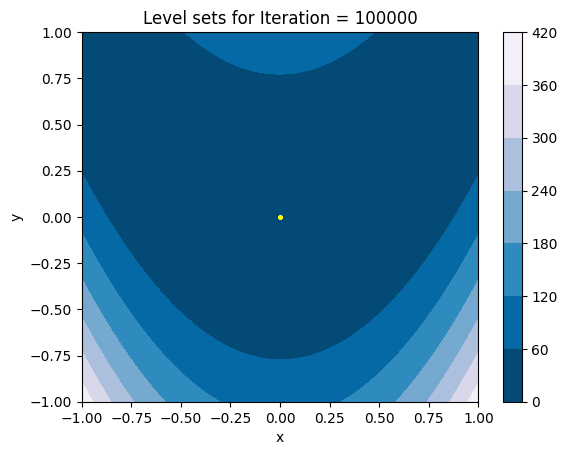

----------------------------------------------------------------------------------------
Iteration = 500000
Minimizer = [0. 0.]
Minimum value = 0.25


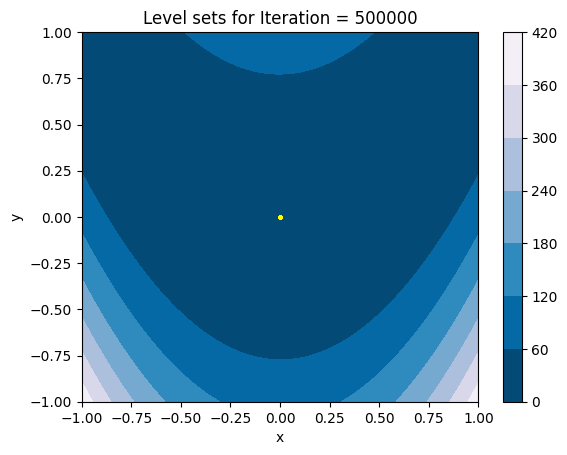

----------------------------------------------------------------------------------------
Iteration = 1000000
Minimizer = [0. 0.]
Minimum value = 0.25


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def f2(x):
    return 100*(x[1]-x[0]**2)**2 + (0.5 - x[0])**2

def grad_f2(x):
    return np.array([-400*(x[1]-x[0]**2),200*x[1]-x[0]**2])

def prox2(y):
    if np.linalg.norm(y) <= 1:
        return y
    else:
        return y / np.linalg.norm(y)

def gradient_descent_with_backtracking_with_scaling1(x0, T):
    x = np.copy(x0)
    k = 0
    pk = -1*grad_f2(x)
    xs = []
    xs.append(x)
    alpha = 0.3

    while k < rho:
        p = -1*grad_f2(x)
        x = x + alpha*p
        x = prox2(x)
        xs.append(x)
        k += 1
    return k, x, f2(x), xs

x0 = np.array([0,0])
T = [10**2, 500, 10**3, 5000, 10**4, 50000, 10**5, 500000, 10**6, 5000000]

for rho in T:
    count3, minimizer3, final_val3, xks3 = gradient_descent_with_backtracking_with_scaling1(x0, rho)
    print('----------------------------------------------------------------------------------------')
    print("Iteration =", count3)
    print("Minimizer =", minimizer3)
    print("Minimum value =", final_val3)

    # Level sets and trajectory
    x_values = np.linspace(-1, 1, 1000)
    y_values = np.linspace(-1, 1, 1000)
    X, Y = np.meshgrid(x_values, y_values)
    Z = f2((X, Y))
    contour_plot = plt.contourf(X, Y, Z, cmap=cm.PuBu_r)
    color_bar = plt.colorbar(contour_plot)

    for i in range(len(xks3)):
        x_coords = [xks3[i][0]]
        y_coords = [xks3[i][1]]
        plt.plot(x_coords, y_coords, color='yellow', marker='o', markersize=2)

    plt.title("Level sets for Iteration = " + str(rho))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()
